# Predicting Home Prices in King County, WA 
## (Seattle Metropolitan Area and Points East)

#### <Jesse Markowitz's Working Notebook for Phase 2 Project>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
raw_df.shape

(21597, 21)

In [24]:
raw_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [25]:
raw_df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

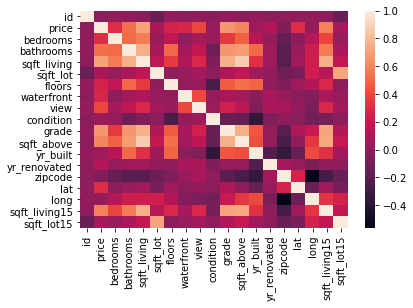

In [22]:
sns.heatmap(raw_df.corr());

## Train-Test Split to create a df for EDA

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y = raw_df['price']
X = raw_df.drop(labels=['price'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

We create a df to use for EDA by re-combining the `X_train` and `y_train` data, then dropping the `['id']` column and resetting the index:

In [48]:
eda_df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).drop('id', axis=1).reset_index(drop=True)

In [49]:
display(eda_df.head())
print(eda_df.shape)

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200


(17277, 20)


In [50]:
eda_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727700e+04,17277.000000,17277.000000,17277.000000,1.727700e+04,17277.000000,15356.000000,17232.000000,17277.000000,17277.000000,17277.000000,17277.000000,14195.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,5.403367e+05,3.374660,2.111333,2077.266192,1.503784e+04,1.491405,0.008075,0.237291,3.411646,7.654570,1784.938357,1970.874747,83.956252,98078.032818,47.559810,-122.214703,1987.588181,12637.828500
std,3.686163e+05,0.931114,0.766177,915.753595,4.099151e+04,0.540391,0.089500,0.771072,0.650234,1.167855,826.015132,29.354222,400.711193,53.478216,0.138647,0.140092,685.403769,25955.985544
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.500000,1425.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470900,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.571400,-122.231000,1840.000000,7620.000000
75%,6.412500e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.126000,2360.000000,10101.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


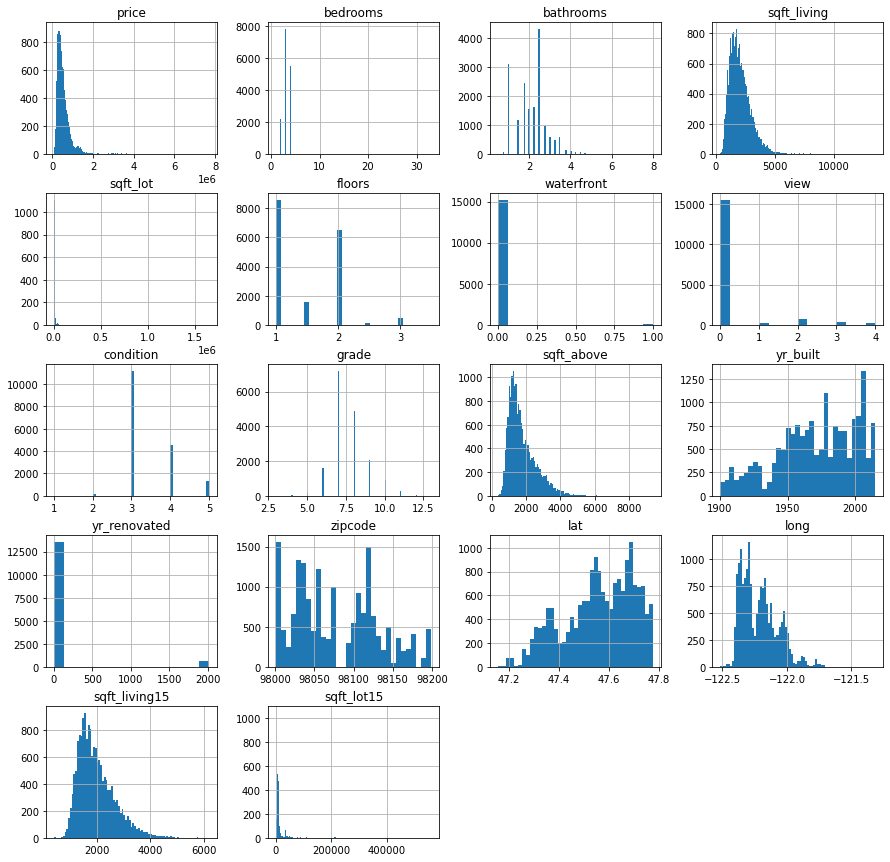

In [54]:
eda_df.hist(figsize=(15, 15), bins='auto');